In [62]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [3]:
events = pd.read_csv('/events.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import sys
sys.path.append('PATH TO MODULE')

In [5]:
import Preprocessing 
prep = Preprocessing.Prerpocessing(events)
prep.preproce_it()
events = prep.events

In [19]:
import Exploratation
exp = Exploratation.Exploration(events)

In [ ]:
import Cohort
cohort = Cohort.Cohort(events)

In [12]:
events.head()

,visit_date,URL_visited,user_id,user_reg_date,week_number,registered_after,mean,std,min,max
0,2018-02-01,https://dasreda.ru/learn/courses/yandeksdirekt...,673,2018-02-01,5,0,7.186047,2.719032,5,12
1,2018-02-01,https://dasreda.ru/learn/courses/odnoklassniki...,673,2018-02-01,5,0,7.186047,2.719032,5,12
2,2018-02-01,https://dasreda.ru/learn/courses/yandeksauditorii,673,2018-02-01,5,0,7.186047,2.719032,5,12
3,2018-02-01,https://dasreda.ru/learn/courses/yandeksauditorii,673,2018-02-01,5,0,7.186047,2.719032,5,12
4,2018-02-01,https://dasreda.ru/learn/courses/yandeksauditorii,673,2018-02-01,5,0,7.186047,2.719032,5,12


In [13]:
events.shape

(52280, 10)

In [ ]:
events.URL_visited.value_counts().nlargest(10)

https://dasreda.ru/learn                         5327
https://dasreda.ru/learn/blog                    2119
https://dasreda.ru/learn/videos                  1622
https://dasreda.ru/learn/courses                 1326
https://dasreda.ru/learn/blog/article/259        1073
https://dasreda.ru/learn/do                      1057
https://dasreda.ru/learn/courses/biznes-klass     712
https://dasreda.ru/learn/blog/article/281         673
https://dasreda.ru/learn/blog/article/234         672
https://dasreda.ru/learn/blog/article/128         644
Name: URL_visited, dtype: int64

In [17]:
events.head()

,visit_date,URL_visited,user_id,user_reg_date,week_number,registered_after,mean,std,min,max
0,2018-02-01,https://dasreda.ru/learn/courses/yandeksdirekt...,673,2018-02-01,5,0,7.186047,2.719032,5,12
1,2018-02-01,https://dasreda.ru/learn/courses/odnoklassniki...,673,2018-02-01,5,0,7.186047,2.719032,5,12
2,2018-02-01,https://dasreda.ru/learn/courses/yandeksauditorii,673,2018-02-01,5,0,7.186047,2.719032,5,12
3,2018-02-01,https://dasreda.ru/learn/courses/yandeksauditorii,673,2018-02-01,5,0,7.186047,2.719032,5,12
4,2018-02-01,https://dasreda.ru/learn/courses/yandeksauditorii,673,2018-02-01,5,0,7.186047,2.719032,5,12


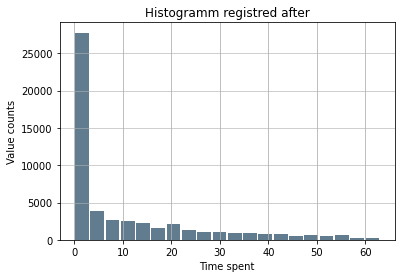

In [20]:
exp.plot_registered_after()

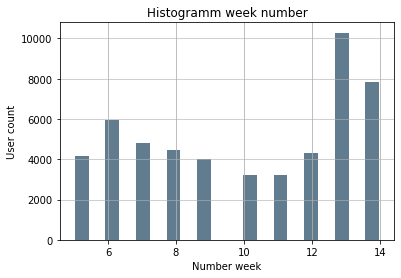

In [21]:
exp.plot_week_number()

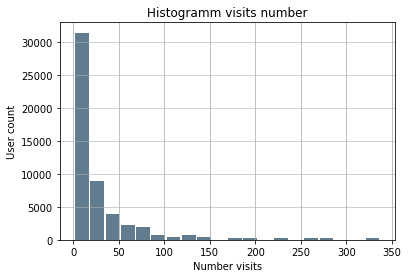

In [61]:
exp.plot_visits_number()

In [29]:
exp.get_count_uniq_users(prep.user_to_dict())

Count of uniq users = 9613
it's 18% of dataset


In [46]:
class Cohort:
    """
    As it was in task, we should create division on cohort groups
    """

    def __init__(self, events=events):
        self.events = events.copy()
        self.events.set_index('user_id', inplace=True)

    def add_cohort_groups(self):
        """
        add different columns for cohort divison
        """
        self.events["CohortGroup"] = (
            self.events.groupby(level=0)["visit_date"].min().dt.isocalendar().week
        )
        self.events["first_visit_week"] = (
            self.events.groupby(level=0)["visit_date"].min().dt.isocalendar().week
        )
        self.events["last_visit_week"] = (
            self.events.groupby(level=0)["visit_date"].max().dt.isocalendar().week
        )
        self.events["visits_number"] = self.events.groupby(level=0)[
            "visit_date"
        ].count()
    
    def 
    

In [47]:
cohort.add_cohort_groups()

,visit_date,URL_visited,user_reg_date,week_number,registered_after,mean,std,min,max,CohortGroup,first_visit_week,last_visit_week,visits_number
user_id,,,,,,,,,,,,,
673,2018-02-01,https://dasreda.ru/learn/courses/yandeksdirekt...,2018-02-01,5,0,7.186047,2.719032,5,12,5,5,12,43
673,2018-02-01,https://dasreda.ru/learn/courses/odnoklassniki...,2018-02-01,5,0,7.186047,2.719032,5,12,5,5,12,43
673,2018-02-01,https://dasreda.ru/learn/courses/yandeksauditorii,2018-02-01,5,0,7.186047,2.719032,5,12,5,5,12,43
673,2018-02-01,https://dasreda.ru/learn/courses/yandeksauditorii,2018-02-01,5,0,7.186047,2.719032,5,12,5,5,12,43
673,2018-02-01,https://dasreda.ru/learn/courses/yandeksauditorii,2018-02-01,5,0,7.186047,2.719032,5,12,5,5,12,43
